This stuff did not work

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from pathlib import Path
import PIL
import matplotlib.pyplot as plt
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.builders import model_builder
from tools import visualize_detection_boxes, Rect
from detection import load_detector, Detection
import numpy as np
MODEL_DIR = Path(r"C:\Users\marti\.keras\datasets\ssd_mobilenet_v2_320x320_coco17_tpu-8\saved_model")

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(str(MODEL_DIR)) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open(MODEL_DIR.with_suffix(".tflite"), 'wb') as f:
    f.write(tflite_model)

In [15]:
detection_fn, category_index = load_detector(r"C:\Users\marti\.keras\datasets\ssd_mobilenet_v2_320x320_coco17_tpu-8")

Loading model...Done! Took 31.45668053627014s


In [3]:


MODEL_DIR = Path(r"C:\Users\marti\.keras\datasets\ssd_mobilenet_v2_320x320_coco17_tpu-8")

pipeline_config = MODEL_DIR / "pipeline.config"
model_dir = 'models/research/object_detection/test_data/checkpoint/'

# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(str(pipeline_config))
model_config = configs['model']
detection_model = model_builder.build(model_config=model_config, is_training=False)

In [4]:
checkpoint_dir = MODEL_DIR / r"checkpoint\ckpt-0"
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(str(checkpoint_dir)).expect_partial()
image, shapes = detection_model.preprocess(tf.zeros([1, 320, 320, 3]))
prediction_dict = detection_model.predict(image, shapes)

INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0


In [5]:
image_pil = PIL.Image.open(r"C:\projects\BirdBox\images\robin_and_great_tit.jpg")
image_np = np.array(image_pil)
image_np = image_np.astype("float32")
image_tf = tf.expand_dims(image_np, 0)

image, shapes = model.preprocess(image_tf)
prediction_dict = model.predict(image_tf, shapes)
detections = model.postprocess(prediction_dict, shapes)
# detections = detection_fn(image_tf)
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
boxes = [Rect(left, top, right, bottom) for top, left, bottom, right in detections["detection_boxes"]]

detections = [Detection(score, box, int(class_)) for score, box, class_
              in zip(detections["detection_scores"], boxes, detections["detection_classes"])
              if class_ == 16 and score > 0.5]


NameError: name 'model' is not defined

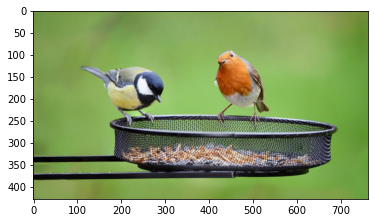

In [45]:
image_np_with_detections = image_np.copy()    
visualize_detection_boxes(image_np_with_detections, detections, category_index)    

plt.imshow(image_np_with_detections / 255)
plt.show()